# Stock Price Prediction

- <a href='#1'>1. Importing Modules</a>
- <a href='#2'>2. Data</a>
- <a href='#3'>3. Exploratory Data Analysis</a>
    - <a href='#3.1'>3.1. Exploratory Report in data</a>
    - <a href='#3.2'>3.2. Time Series Visualization of Mid Prices</a>
- <a href='#4'>4. Data preprocessing</a>
    - <a href='#4.1'>4.1. Splitting Data into a Training set and a Test set</a>

- <a href='#5'>5. Model Building</a>
   

# <a id='1'>1.Importing Modules</a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas_profiling as pf
#import utils

# <a id='2'>2.Data</a>

In [10]:
url_path = "Dataset\Stocks"
def read_data(url_path, text_file = ""):
    "Accepts data directory path"
    
    # storing the data into a dataframe df
    df = pd.read_csv(os.path.join(url_path, text_file), delimiter = ",", usecols = ["Date", "High", "Low", "Close"])
    print("[INFO] Data Loaded...")
    return df

df = read_data(url_path, text_file = "hpq.us.txt")
#df = df.sort_values("Date")  

[INFO] Data Loaded...


# <a id='3'>3.Data Exploration</a>

In [11]:
df.head()

,Date,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627
1,1970-01-05,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385
4,1970-01-08,0.31768,0.31385,0.31385


In [12]:
print(df.shape)
df.describe()

(12075, 4)


,High,Low,Close
count,12075.000000,12075.000000,12075.000000
mean,6.834001,6.644309,6.740256
std,6.444463,6.261201,6.354457
min,0.118670,0.114820,0.114820
25%,1.071800,1.044900,1.056300
50%,3.793100,3.712800,3.751100
75%,11.856500,11.482000,11.664000
max,29.857000,28.062000,29.857000


## <a id='3.1'>3.1. Exploratory Report in data</a>

In [13]:
#pf.ProfileReport(df)

## <a id='3.2'>3.2. Time Series Visualization of Mid Prices</a>

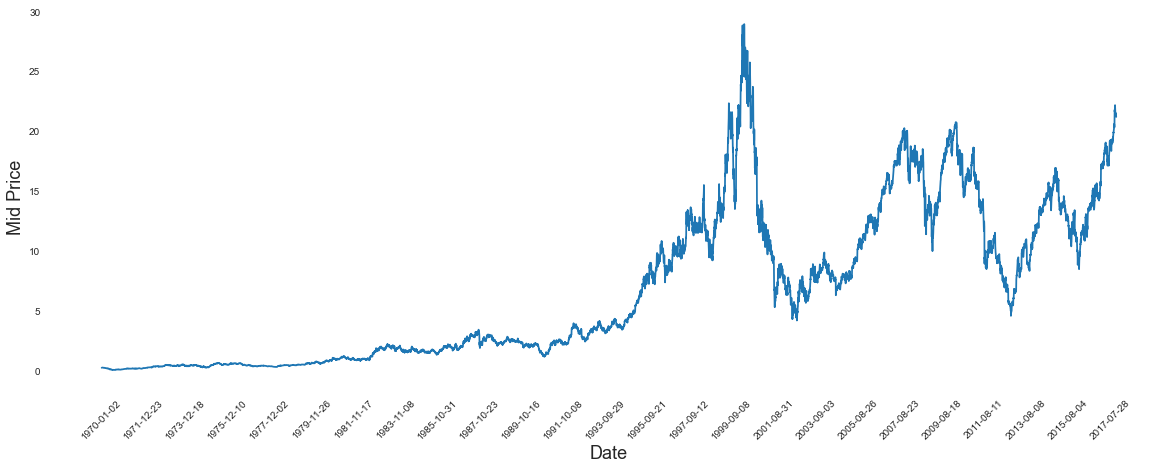

<Figure size 1440x936 with 0 Axes>

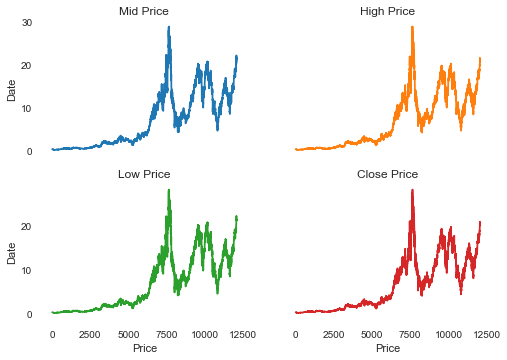

In [14]:
df['mid'] = (df['Low'] + df["High"])/2.0
plt.figure(figsize = (20,7))
plt.plot(range(df.shape[0]), df["mid"])
plt.xticks(range(0, df.shape[0], 500), df["Date"].loc[::500], rotation = 45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()


plt.figure(figsize = (20,13))
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(df.shape[0]), df["mid"])
axs[0, 0].set_title('Mid Price')
axs[0, 1].plot(range(df.shape[0]), df["High"], 'tab:orange')
axs[0, 1].set_title('High Price')
axs[1, 0].plot(range(df.shape[0]), df["Low"], 'tab:green')
axs[1, 0].set_title('Low Price')
axs[1, 1].plot(range(df.shape[0]), df["Close"], 'tab:red')
axs[1, 1].set_title('Close Price')

for ax in axs.flat:
    ax.set(xlabel='Price', ylabel='Date')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [15]:
import plotly.graph_objects as go

trace = {
    'x': df.index,
    'y': df.Close,
    'type': 'scatter',
    'showlegend': True,
    "name": "Close"
}

trace2 = {
    'x': df.index,
    'y': df.High,
    'type': 'scatter',
    'showlegend': True,
    "name": "High"
}

trace3 = {
    'x': df.index,
    'y': df.Low,
    'type': 'scatter',
    'showlegend': True,
    "name": "Low"
}

trace4 = {
    'x': df.index,
    'y': df.mid,
    'type': 'scatter',
    'showlegend': True,
    "name": "mid"
}


data = [trace, trace2, trace3, trace4
       ]
layout = go.Layout({
    'title': {
        'text': 'Time Series Distribution for all stock prices',
        'font': {
            'size': 15
        }
    }
})

fig = go.Figure(data = data, layout = layout)
fig.write_html("candle.html")
fig.show()

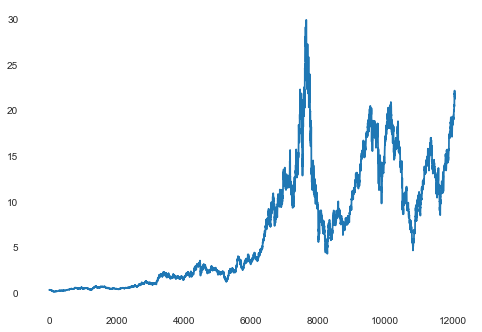

In [16]:
# instantiate our scaler class
scaler = MinMaxScaler(feature_range = (0, 1))

# set our target variable to the closing price
plt.plot(df["Close"], label = "Close")

In [31]:
# Linear Regression Implementation
df["Date"] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending = True, axis = 0)

# let create a new dataset 
df_new = pd.DataFrame(index = range(0, len(df)), columns = ["Date", "Close"])

for i in range(0, len(df)):
    df_new["Date"][i] = data['Date'][i]
    df_new["Close"][i] = data["Close"][i]
    
from fastai.tabular import add_datepart
add_datepart(df_new, "Date")
df_new.columns
df_new.drop("Elapsed", axis = 1, inplace = True)

In [60]:
from sklearn.metrics import mean_squared_error

df_new['monday_friday'] = 0
for i in range(0, len(df_new)):
    if (df_new["Dayofweek"][i] == 0 or df_new["Dayofweek"][i] == 4):
        df_new["monday_friday"][i] = 1
    else:
        df_new["monday_friday"][i] = 0

        

train = df_new[:11000]
validation = df_new[11000:]

X_train = train.drop("Close", axis = 1)
y_train = train["Close"]

X_validation = validation.drop('Close', axis=1)
y_validation = validation['Close']

# Linear Regression implementation
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


pred = lr_model.predict(X_validation)
root_mean_squared_err = np.sqrt(mean_squared_error(y_validation, pred))

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
root_mean_squared_err

3.0522383151366608

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



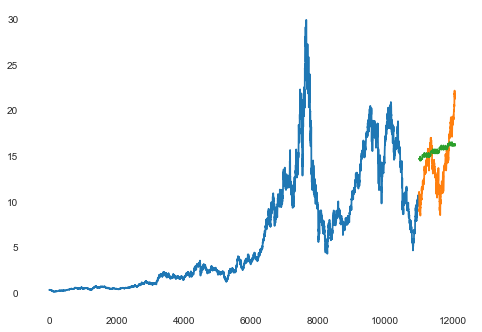

In [37]:
validation["Predictions"] = 0
validation["Predictions"] = pred
validation.index = df_new[11000:].index
train.index = df_new[:11000].index

plt.plot(train["Close"])
plt.plot(validation[["Close", "Predictions"]])

In [46]:
import pmdarima as pm


training = y_train
validation = y_validation
arima_model = pm.auto_arima(training, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = 1, D = 1, trace = True, error_action = "ignore", suppress_warnings = True)
arima_model.fit(training)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=-1679.409, BIC=-1642.887, Time=91.280 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=5129.943, BIC=5144.551, Time=3.650 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=2262.090, BIC=2291.308, Time=17.465 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=-1631.756, BIC=-1602.538, Time=71.033 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=5127.943, BIC=5135.247, Time=2.219 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=4531.016, BIC=4560.234, Time=35.086 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=-1737.650, BIC=-1693.8

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), suppress_warnings=True)

In [63]:
validation = pd.DataFrame(validation, columns = ["Close"])
forcast_result = pd.DataFrame(forcast_result, columns = ["Prediction"])
#forcast_result

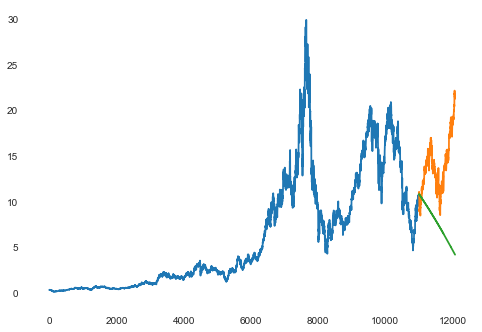

In [69]:
forcast_result = arima_model.predict(n_periods = 1075)
forcast_result = pd.DataFrame(forcast_result, index = validation.index, columns = ["Prediction"])


# Result
plt.plot(train["Close"])
plt.plot(validation["Close"])
plt.plot(forcast_result["Prediction"])

In [71]:
root_mean_squared_err_arima = np.sqrt(mean_squared_error(validation["Close"], forcast_result["Prediction"]))
root_mean_squared_err_arima

7.679912351354791

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

dataset = df_new.values

train_ = pd.DataFrame(dataset[0:11000, :], columns = list(df_new.columns))
valid_ = pd.DataFrame(dataset[11000:,:], columns = list(df_new.columns))

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_df = scaler.fit_transform(dataset)

X_train_new, y_train_new = [], []

for i in range(60, len(train)):
    X_train_new.append(scaled_df[i-60:i, 0])
    y_train_new.append(scaled_df[i, 0])
    
#X_train_new, y_train_new = np.array(X_train_new), np.array(y_train_new)
X_train_new = np.reshape(X_train_new, (np.shape(X_train_new)[0], np.shape(X_train_new)[1], 1))


model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_new.shape[1],1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_new, X_train_new, epochs=1, batch_size=1, verbose=2)


10940/10940 - 52s - loss: 0.0012


In [163]:
inputs = df_new[len(df_new) - len(valid_) - 60:].values
#inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (np.shape(X_test)[0], np.shape(X_test)[1], 1))
close_price = model_lstm.predict(X_test)
close_price_like = np.zeros(shape = (len(close_price), 14))
close_price_like[:, 0] = close_price[:,0]
close_price = scaler.inverse_transform(close_price_like)
close_price = pd.DataFrame(close_price)
root_mean_squared_lstm = mean_squared_error(valid_["Close"].values, close_price[0])

In [164]:
root_mean_squared_lstm

0.4637195721991204

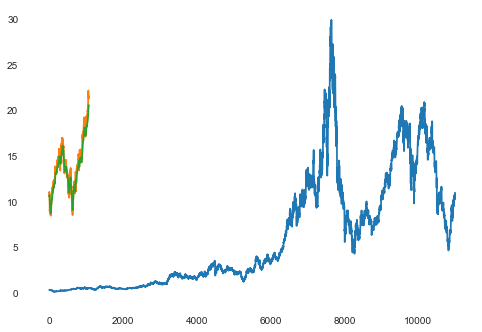

In [165]:
valid_['Predictions'] = close_price[0]
plt.plot(train_['Close'])
plt.plot(valid_[['Close','Predictions']])